# Лабораторная работа 5

## Ансамбли моделей машинного обучения.

### Цель лабораторной работы: изучение ансамблей моделей машинного обучения.

Задание: Выберите набор данных (датасет) для решения задачи классификации или регресии.

В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

С использованием метода train_test_split разделите выборку на обучающую и тестовую.

Обучите следующие ансамблевые модели:

одну из моделей группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья); одну из моделей группы бустинга; одну из моделей группы стекинга. (+1 балл на экзамене) Дополнительно к указанным моделям обучите еще две модели:

Модель многослойного персептрона. По желанию, вместо библиотеки scikit-learn возможно использование библиотек TensorFlow, PyTorch или других аналогичных библиотек. Модель МГУА с использованием библиотеки - https://github.com/kvoyager/GmdhPy (или аналогичных библиотек). Найдите такие параметры запуска модели, при которых она будет по крайней мере не хуже, чем одна из предыдущих ансамблевых моделей. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

target_col = 'Entity'

In [ ]:
data = pd.read_csv('./nuclear-warhead-stockpiles.csv')
data

,Entity,Code,Year,nuclear_weapons_stockpile
0,China,CHN,1945,0
1,China,CHN,1946,0
2,China,CHN,1947,0
3,China,CHN,1948,0
4,China,CHN,1949,0
...,...,...,...,...
775,United States,USA,2018,3785
776,United States,USA,2019,3805
777,United States,USA,2020,3750
778,United States,USA,2021,3708


In [ ]:
data.shape

(780, 4)

Предварительная обработка

Удаляем столбцы с пустыми значениями:

In [ ]:
data = data.dropna(axis=1, how='any')
data

,Entity,Code,Year,nuclear_weapons_stockpile
0,China,CHN,1945,0
1,China,CHN,1946,0
2,China,CHN,1947,0
3,China,CHN,1948,0
4,China,CHN,1949,0
...,...,...,...,...
775,United States,USA,2018,3785
776,United States,USA,2019,3805
777,United States,USA,2020,3750
778,United States,USA,2021,3708


In [ ]:
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    if null_count == 0:
        column_type = data[col].dtype
        print('{} - {} - {}'.format(col, column_type, null_count))

Entity - object - 0
Code - object - 0
Year - int64 - 0
nuclear_weapons_stockpile - int64 - 0


In [ ]:
le = LabelEncoder()
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        data[col] = le.fit_transform(data[col]);
        print(col)

Entity
Code


## Разделение выборки на обучающую и тестовую

In [ ]:
from sklearn.model_selection import train_test_split

data_x = data.loc[:, data.columns != target_col]
data_y = data[target_col]

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3, random_state=1)

In [ ]:
train_x.shape

(546, 3)

In [ ]:
test_x.shape

(234, 3)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score

def test_model(model):
    print('mean_absolute_error: {}'.format(round(mean_absolute_error(test_y, model.predict(test_x)), 2)))
    print('median_absolute_error: {}'.format(round(median_absolute_error(test_y, model.predict(test_x)), 2)))
    print('r2_score: {}'.format(round(r2_score(test_y, model.predict(test_x)), 2)))

## Обучение моделей
### Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor

ran_80 = RandomForestRegressor(n_estimators=80)
ran_80.fit(train_x, train_y)

RandomForestRegressor(n_estimators=80)

In [ ]:
test_model(ran_80)

mean_absolute_error: 0.01
median_absolute_error: 0.0
r2_score: 1.0


In [ ]:
param_range = np.arange(50, 170, 10)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}],
             return_train_score=True, scoring='r2')

In [ ]:
reg = gs.best_estimator_

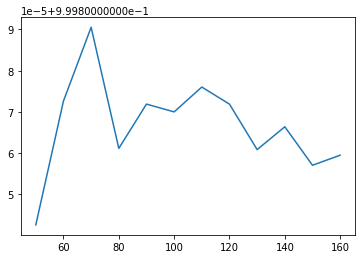

In [ ]:
import matplotlib.pyplot as plt

plt.plot(param_range, gs.cv_results_["mean_train_score"]);

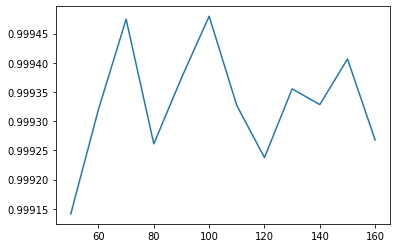

In [ ]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [ ]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 0.01
median_absolute_error: 0.0
r2_score: 1.0


## Градиентный бустинг

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gr_80 = GradientBoostingRegressor(n_estimators=80)
gr_80.fit(train_x, train_y)

GradientBoostingRegressor(n_estimators=80)

In [ ]:
test_model(gr_80)

mean_absolute_error: 0.03
median_absolute_error: 0.02
r2_score: 1.0


In [ ]:
gs = GridSearchCV(GradientBoostingRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}],
             return_train_score=True, scoring='r2')

In [ ]:
reg = gs.best_estimator_

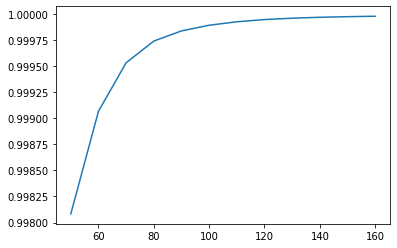

In [ ]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

In [ ]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 0.02
median_absolute_error: 0.01
r2_score: 1.0
